In [22]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [16]:
img = cv2.imread('yuvraj_singh/91I79eKcaCL.jpg')

(2560, 1595, 3)


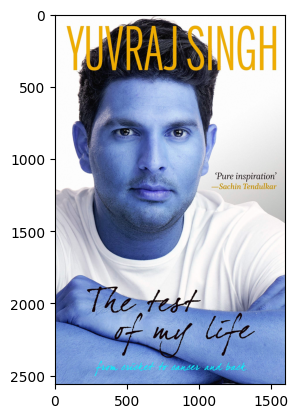

In [17]:
print(img.shape)
plt.imshow(img)

(2560, 1595)


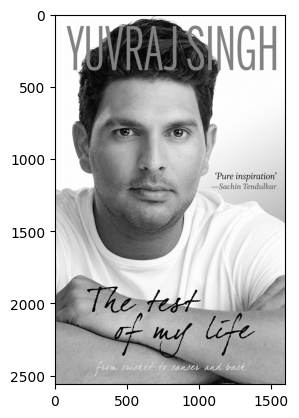

In [18]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(gray.shape)
plt.imshow(gray,cmap='gray')

In [19]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[203, 457, 951, 951]], dtype=int32)

In [20]:
(x,y,h,w)  =faces[0]

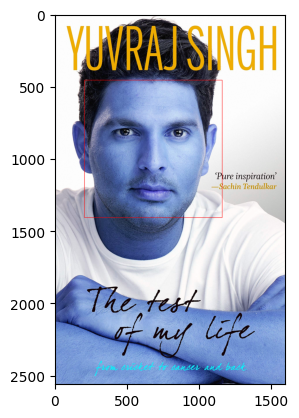

In [21]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

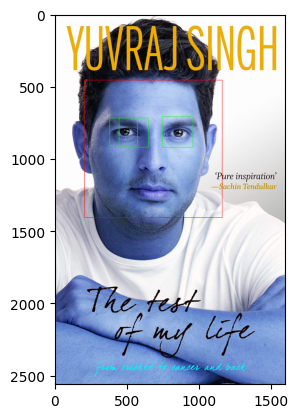

In [63]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

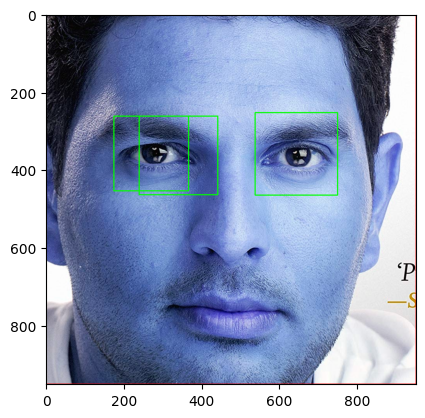

In [64]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [25]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [27]:
import os
img_dirs = []
for i in os.scandir('dataset'):
    if i.is_dir():
        img_dirs.append(i.path)

In [28]:
img_dirs

['dataset/yuvraj_singh',
 'dataset/sachin_tendulkar ',
 'dataset/virat_kohli',
 'dataset/ms_dhoni']

In [29]:
import shutil
if os.path.exists('dataset/cropped'):
     shutil.rmtree('dataset/cropped')
os.mkdir('dataset/cropped')

In [58]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    c_name  = img_dir.split('/')[-1]
    celebrity_file_names_dict[c_name] = []

    for i in os.scandir(img_dir):
        if i.name.split('.')[-1] in ('jpeg','jpg','png') :
            roi_color = get_cropped_image_if_2_eyes(i.path)
            if roi_color is not None:
                cropped_folder = 'dataset/cropped/' + c_name
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                cropped_file_name = c_name + str(count) + ".png"
                cropped_file_path = cropped_folder + "/" + cropped_file_name 
                
                cv2.imwrite(cropped_file_path, roi_color)
                celebrity_file_names_dict[c_name].append(cropped_file_path)
                count += 1    

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


In [60]:
import pywt   

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

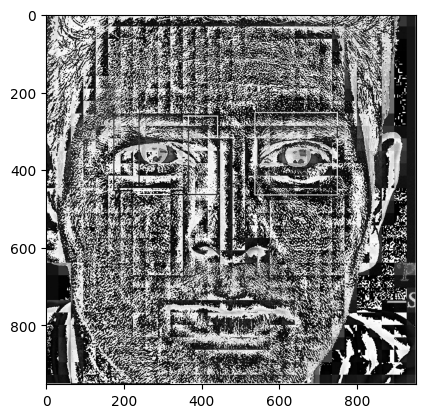

In [65]:
im_har = w2d(np.array(roi_color),'db1',5)
plt.imshow(im_har, cmap='gray')

In [66]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'yuvraj_singh': 0, 'sachin_tendulkar ': 1, 'virat_kohli': 2, 'ms_dhoni': 3}

In [88]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])  

[ WARN:0@8001.605] global loadsave.cpp:244 findDecoder imread_('dataset/cropped/yuvraj_singh/yuvraj_singh14.png'): can't open/read file: check file path/integrity
[ WARN:0@8001.620] global loadsave.cpp:244 findDecoder imread_('dataset/cropped/yuvraj_singh/yuvraj_singh23.png'): can't open/read file: check file path/integrity
[ WARN:0@8001.708] global loadsave.cpp:244 findDecoder imread_('dataset/cropped/sachin_tendulkar /sachin_tendulkar 2.png'): can't open/read file: check file path/integrity
[ WARN:0@8001.711] global loadsave.cpp:244 findDecoder imread_('dataset/cropped/sachin_tendulkar /sachin_tendulkar 5.png'): can't open/read file: check file path/integrity
[ WARN:0@8001.711] global loadsave.cpp:244 findDecoder imread_('dataset/cropped/sachin_tendulkar /sachin_tendulkar 6.png'): can't open/read file: check file path/integrity
[ WARN:0@8001.716] global loadsave.cpp:244 findDecoder imread_('dataset/cropped/sachin_tendulkar /sachin_tendulkar 9.png'): can't open/read file: check file p

In [89]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(122, 4096)

In [76]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

pipe = Pipeline([('scaler', MinMaxScaler()), ('svc', SVC(kernel = 'rbf', C = 100))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7837837837837838

In [93]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.57      1.00      0.73         8
           1       0.86      0.86      0.86        14
           2       1.00      0.69      0.82        13
           3       0.00      0.00      0.00         2

    accuracy                           0.78        37
   macro avg       0.61      0.64      0.60        37
weighted avg       0.80      0.78      0.77        37



/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [95]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [96]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [98]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(MinMaxScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.752941,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.564706,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.741176,{'logisticregression__C': 1}


In [99]:
best_estimators

{'svm': Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [100]:
best_estimators['svm'].score(X_test,y_test)

0.8648648648648649

In [101]:
best_estimators['random_forest'].score(X_test,y_test)

0.5945945945945946

In [102]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8378378378378378

In [103]:
best_clf = best_estimators['svm']

In [104]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 8,  0,  0,  0],
       [ 1, 13,  0,  0],
       [ 4,  0,  9,  0],
       [ 0,  0,  0,  2]])

Text(95.72222222222221, 0.5, 'Truth')

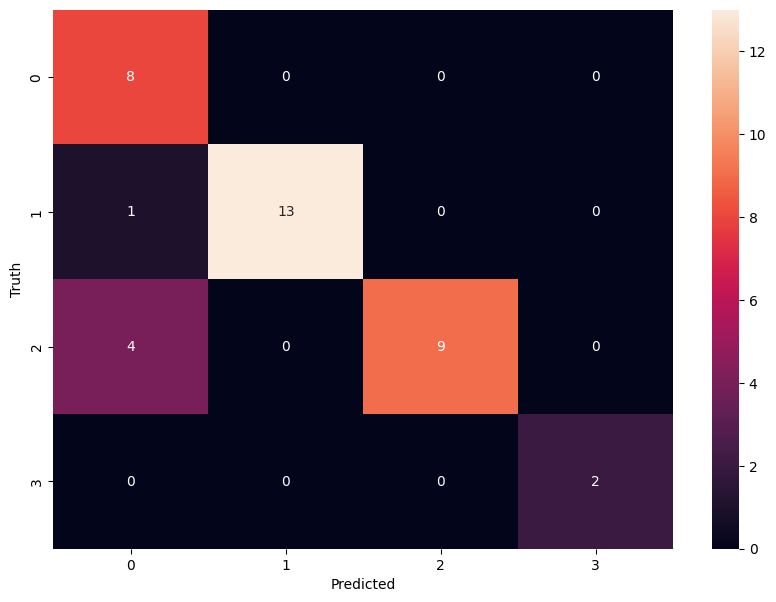

In [105]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [106]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 


['saved_model.pkl']

In [107]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))